# Random Forest

It contains many decision trees and it will aggregate for further accuracy

#  Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

# Dataset and Cleaning

In [2]:
#import dataset
df = pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Renaming Columns

df.columns

col_names = ["ID", "dependents", "education", "self-employed", "income_annum", "loan_amount", 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

df.columns = col_names
df.head()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Label Encoder

Changing any categorical data to binary

For example: Graduate and not Graduate will be 0 and 1

In [4]:
categorical_data = ["education", "self-employed", "loan_status"]
label_encoder = LabelEncoder()

for i in categorical_data:
    df[i] = label_encoder.fit_transform(df[i])

df.head()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [5]:
# Calling Describe

df.describe()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.377840
std,1232.498479,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,1.000000,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,0.000000
75%,3202.000000,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


# Feature Selection

Means splitting the data into independent and dependent variables

In [6]:
clean_data = df.drop(['ID'], axis=1)

In [7]:
# Split into x (features) and y (target)

X = clean_data.iloc[:, :-1].values #independent variables
y = clean_data.iloc[:, -1].values #dependent variable

# Splitting the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the model

In [9]:
random_forest_model = RandomForestClassifier()
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

# Predictions

In [11]:
y_pred = random_forest_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [12]:
table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
table

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
849,0,0
850,0,0
851,0,0
852,0,0


# Model Evaluation

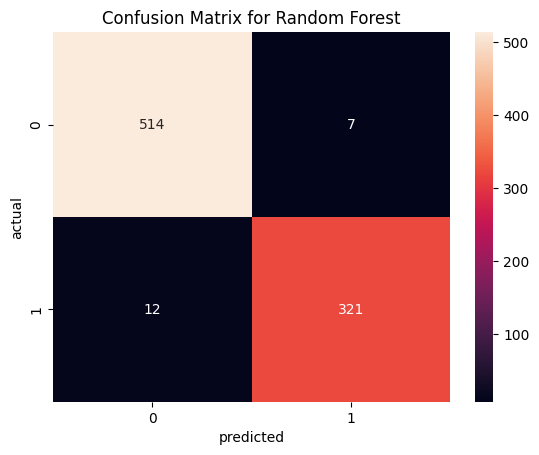

In [13]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [14]:
# classification report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       521
           1       0.98      0.96      0.97       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



# AUC - ROC


In [15]:
# return n_samples and n_classes
y_pred_probab = random_forest_model.predict_proba(X_test)

fpr, tpr, tresholds = roc_curve(y_test, y_pred_probab[:, 1])

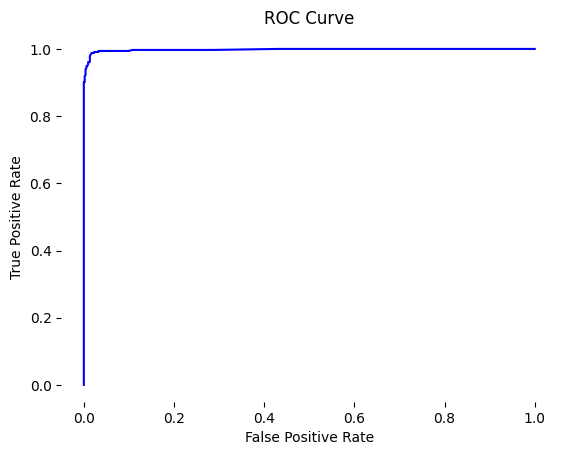

In [16]:
plt.plot(fpr, tpr, label="Random Forest Tree", color = "blue")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.box(False)
plt.show()

In [19]:
auc_score = roc_auc_score(y_test, y_pred_probab[: , 1])
print(auc_score * 100)

99.77924181379076


In [20]:
# checking the accuracy score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

97.7751756440281


# Hyperparameter Tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import random


param_dist = {
    'n_estimators': [num for num in range(2, 100)], # this is the number of deicision trees in the forest
    'max_depth': [num for num in range(1, 20)] # the limits how deep each tree can grow
}

#Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
    rf,
    param_distributions = param_dist,
    n_iter = 5, # Only 5 different combination of n_estimators and max_depth will be tested
    cv = 5 # data will be split into 5 folds
)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, ...]})

In [22]:
'''
n_estimators enough estimators to capture most of the signal without overfitting
max_depth How deep the trees can grow to capture complex patterns but still have a
limit to avoid overfitting
'''

print(rand_search.best_params_)

{'n_estimators': 28, 'max_depth': 14}


In [23]:
y_pred = rand_search.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

98.59484777517564
